In [1]:
from glob import glob
from rootpy.io import root_open
from rootpy.tree import Tree, TreeChain
from root_ numpy import root2array, root2rec, tree2rec

In [2]:
skimdir='/run/media/ephelps/f8e8ff7e-2321-46f9-b5f5-203391519da8/jobs/skim.20140102/batch'
runfiles=glob('%s/e1f_skim/3????.root'%skimdir)
#fin = root_open('%s/e1f_skim/38121.root'%skimdir)
#fin = root_open('%s/e1f_skim/38320.root'%skimdir)
#rec = root2rec('%s/e1f_skim/38320.root'%skimdir, 'h10clone/h10', branches=['gpart','id','p','acos(cz)'], selection='id[1]==2212')
#c = TreeChain(name='h10clone/h10', files=runfiles, branches=['gpart', 'p', 'cx', 'cy', 'cz', 'id', 'm', 'b', 'vx', 'vy', 'vz'])

In [3]:
from ROOT import TChain
c = TChain('h10clone/h10')
c.Add('%s/e1f_skim/3????.root'%skimdir, -1)

606

In [4]:
electrons_rec = tree2rec(c, branches=['gpart','id','p','acos(cz)'], selection='id[1]==2212')

(0, 13200000.000000002)

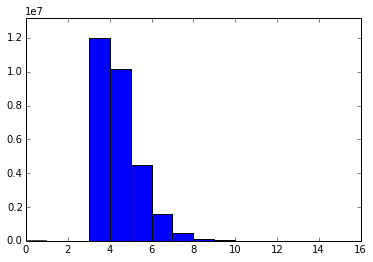

In [5]:
hist(electrons_rec.gpart, bins=range(0,16))
xlim(0,16)
ylim(0,1.1*ylim()[1])

In [6]:
def pad_list(lst):
    inner_max_len = max(map(len, lst))
    map(lambda x: x.extend([0]*(inner_max_len-len(x))), lst)
    return np.array(lst)

def apply_to_zeros(lst, dtype=np.float32):
    inner_max_len = max(map(len, lst))
    result = np.zeros([len(lst), inner_max_len], dtype)
    for i, row in enumerate(lst):
        for j, val in enumerate(row):
            result[i][j] = val
    return result

apply_to_zeros(rec.p[0:10])

array([[ 3.1598103 ,  1.07675195,  1.80408871,  3.24941087,  0.        ],
       [ 1.2977668 ,  0.29419532,  2.70708203,  1.4230119 ,  0.        ],
       [ 2.69036531,  1.64933836,  1.02215159,  0.        ,  0.        ],
       [ 2.13719225,  1.41566408,  1.37959206,  0.        ,  0.        ],
       [ 2.67903829,  1.25401855,  0.41871911,  0.        ,  0.        ],
       [ 1.10876429,  1.18268383,  2.84615397,  1.07327902,  0.        ],
       [ 1.87834013,  1.17450082,  0.79439324,  0.        ,  0.        ],
       [ 0.83259052,  0.56051278,  0.86335284,  0.        ,  0.        ],
       [ 1.04556155,  0.34038353,  1.69093907,  0.17958966,  1.12469709],
       [ 2.89906955,  1.65860152,  1.43593311,  0.        ,  0.        ]], dtype=float32)

In [6]:
c.Draw("p[0]>>hp_e(500,0.083,5.083)", "id[0]==11", "", 100000)
c.Draw("p[0]>>hp_e2(500,0.083,5.083)", "id[0]==11 && nphe[cc[0]-1]>30", "same", 100000)
c.Draw("p>>hp_pim(500,0.083,5.083)", "id==-211", "same", 300000)
c.Draw("p>>hp_pip(500,0.083,5.083)", "id==211", "same", 100000)

62168L

In [7]:
c.Draw("nphe[cc[0]-1]:acos(cz)", "id[0]==11", "colz", 100000)

382874L

In [8]:
c.Draw("p[2]>>hp_pim(500,0.083,5.083)", "id[2]==-211 && nphe[cc[0]-1]>30", "", 300000)

25428L